> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [69]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [70]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()
#Cast and genre have multiple values. Will need to separate genres in case we want to use it as a metric.
#Some columns we can drop: homepage, tagline, overview. It is better to drop them before doing any other cleanup.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [71]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [72]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [73]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [74]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [75]:
df.shape

(10866, 21)

In [76]:
# We may explore the effect of genre on profit/popularity.
# Determine if we need to clean the data
unique_genres=df.genres.unique()
print(len(unique_genres))

2040


In [77]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [78]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Start by dropping values not relevant to questions asked in second part. 
#We can also drop the budget and revenue because adjusted values can be compared.
df.drop(['homepage', 'tagline', 'overview', 'budget', 'revenue'], axis=1, inplace=True)

In [79]:
#Drop all the rows where budget or revenue are zero
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]

In [80]:
#Drop all rows where the bugest is less than one million
df = df[df.budget_adj > int(1e6)]
#Check the smallest adjusted budjet
print(min(df['budget_adj']))

1002810.20847421


In [81]:
#Drop all the rows where the vote count is less than 100 people
df= df[df.vote_count > 100]
print(min(df['vote_count']))

101


In [82]:
#Drop all the movies shorter than 5 minutes
df= df[df.runtime >= 5]
print(min(df['runtime']))


63


In [83]:
#For simplicity make make all budgets  in millions
df['budget_adj'] = df['budget_adj']/1e6
df['revenue_adj'] = df['revenue_adj']/1e6


In [84]:
#Create columns that will take binary values for genre
df['Horror']= None
df['Comedy']= None
df['Action'] = None
df['Thriller'] = None
df['SciFi'] = None

#Define genres that we want to evaluate
Horror= df['genres'].str.contains('Horror', case=True)
Action = df['genres'].str.contains('Action', case=True)
Comedy = df['genres'].str.contains('Comedy', case=True)
Thriller = df['genres'].str.contains('Thriller', case=True)
SciFi = df['genres'].str.contains('Science Fiction', case=True)

#Fill up the columns with corresponding values
df['Horror'] = Horror
df['Action'] = Action
df['Comedy'] = Comedy
df['Thriller']= Thriller
df['SciFi'] = SciFi
df.head()

#Note: It is understood we can take a row in 'genres' and split it into several more rows, one for each genre.
#However that would create a redundant title, like a movie repeated in four rows.
#If we have a masssive data set, adding a limited amount of columns might be better than adding an unkown amount of rows.

,id,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,Horror,Comedy,Action,Thriller,SciFi
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,5562,6.5,2015,137.999939,1392.445893,False,False,True,True,True
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,6185,7.1,2015,137.999939,348.161292,False,False,True,True,True
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,...,2480,6.3,2015,101.199955,271.619025,False,False,False,True,True
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,...,5292,7.5,2015,183.999919,1902.723130,False,False,True,False,True
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,...,2947,7.3,2015,174.799923,1385.748801,False,False,True,True,False


In [85]:
#Make a count of how movies of each type we have for the types to study
movie_count=[]

movie_count.append(sum(df['Horror']== True))
movie_count.append(sum(df['Action']== True))
movie_count.append(sum(df['Comedy']== True))
movie_count.append(sum(df['Thriller']== True))
movie_count.append(sum(df['SciFi']== True))
print(movie_count)


[278, 803, 871, 839, 386]


In [86]:
#We notice that there are a lot less Horror and Scifi movies than the other genres.
#This may affect the validity of future comparisons.

In [87]:
#Get the size of the data after all the changes.
df.shape

(2560, 21)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Does a higher buget mean higher Profit? Are budgets going up with time?

<function matplotlib.pyplot.show>

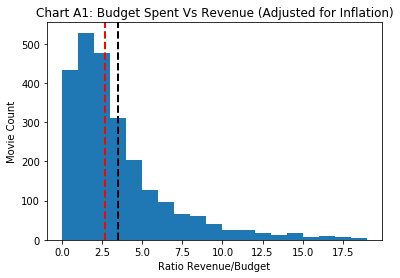

In [88]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
budget= df.budget_adj
revenue= df.revenue_adj

# Define profit as the ratio of money won over money spent.
profit= np.divide(revenue, budget) 
# Create the bin for the histogram.
ratio= np.arange(0, 20, 1)

#Get the average profitability and the median
avg_profit= df.revenue_adj.mean() / df.budget_adj.mean()
median_profit= profit.median()

#Histogram input and labels
plt.xlabel('Ratio Revenue/Budget')
plt.ylabel('Movie Count')
plt.hist(profit, bins=ratio)
plt.title('Chart A1: Budget Spent Vs Revenue (Adjusted for Inflation)')
#Draw the average line in black
plt.axvline(avg_profit, color='k', linestyle='dashed', linewidth=2)
#Draw median in red
plt.axvline(median_profit, color='r', linestyle='dashed', linewidth=2)

plt.show

In [89]:
#In chart 1 plot a histogram of profitability to see the ROI on a typical movie.
#Vertical black line is the average and red is the median.
#The plot is skewed to the right and your average movie will return about 3 times its budget

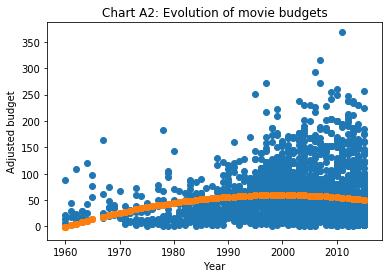

In [90]:
#Is the budget going up with time?
x_budg=df['release_year']
y_budg=df['budget_adj']
plt.scatter(x_budg, y_budg)
#Fit a 2nd order curve to chart
a, b, c= np.polyfit(df['release_year'], df['budget_adj'], 2)
#Add the curve to the plot
plt.scatter(x_budg, a*(x_budg)**2 + b*x_budg + c)
#Add labels
plt.xlabel('Year')
plt.ylabel('Adjusted budget')
plt.title('Chart A2: Evolution of movie budgets')

#Show the plot
plt.show()

In [91]:
#Chart 2 shows the evolution of the budget as the years go on.
#We are using adjusted budgets so that the dollars spend in the 70s can be compared to the ones spent in the 2000s.
#Use a 2nd order curve fitting instead of a linear one assuming it offers a better fit.
#Note that we are not limiting ourselves to any time period
#The budgets kept increasing until they hit a peak in the 2000s and then steadily decreased. 

### Research Question 2 : Is a particular genre more popular?

In [92]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#Create an array range for ratings
vote_range = np.arange(0, 11, 1)
vote_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<function matplotlib.pyplot.show>

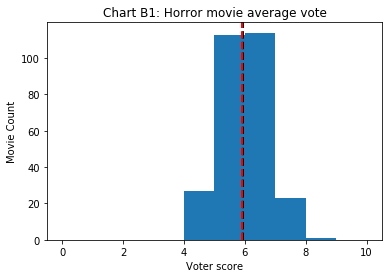

In [93]:
#Create a sub dataframe for horror movies
df_horror = df[df.Horror == 1]

#Horror movie statistics
horror_avg= df_horror['vote_average'].mean()
horror_median = df_horror['vote_average'].median()

#Histogram input and labels
plt.xlabel('Voter score')
plt.ylabel('Movie Count')
plt.hist(df_horror['vote_average'], bins=vote_range)
plt.title('Chart B1: Horror movie average vote')
#Draw the average line in black
plt.axvline(horror_avg, color='k', linestyle='dashed', linewidth=2)
#Draw median in red
plt.axvline(horror_median, color='r', linestyle='dashed', linewidth=2)

plt.show


In [94]:
#Chart B2 shows the distribution of the average score for a horror movie.
#The average and the median are almost equal.
#We don't notice any outliers.

<function matplotlib.pyplot.show>

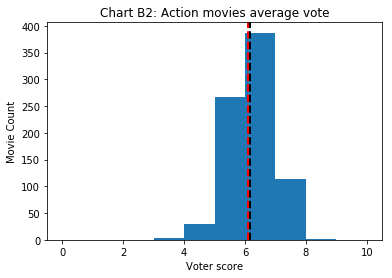

In [95]:
#Create a sub dataframe for action movies
df_action = df[df.Action == 1]

#Action movies statistics
action_avg= df_action['vote_average'].mean()
action_median = df_action['vote_average'].median()

#Histogram input and labels
plt.xlabel('Voter score')
plt.ylabel('Movie Count')
plt.hist(df_action['vote_average'], bins=vote_range)
plt.title('Chart B2: Action movies average vote')
#Draw the average line in black
plt.axvline(action_avg, color='k', linestyle='dashed', linewidth=2)
#Draw median in red
plt.axvline(action_median, color='r', linestyle='dashed', linewidth=2)

plt.show


In [96]:
#Same observation as chart B1.

<function matplotlib.pyplot.show>

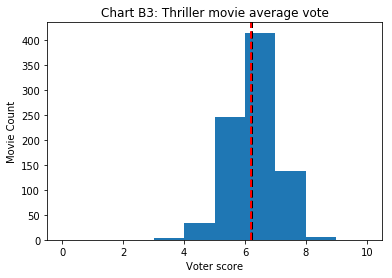

In [97]:
#Create a sub dataframe for thriller movies
df_thriller = df[df.Thriller == 1]

#Action movies statistics
thriller_avg= df_thriller['vote_average'].mean()
thriller_median = df_thriller['vote_average'].median()

#Histogram input and labels
plt.xlabel('Voter score')
plt.ylabel('Movie Count')
plt.hist(df_thriller['vote_average'], bins=vote_range)
plt.title('Chart B3: Thriller movie average vote')
#Draw the average line in black
plt.axvline(thriller_avg, color='k', linestyle='dashed', linewidth=2)
#Draw median in red
plt.axvline(thriller_median, color='r', linestyle='dashed', linewidth=2)

plt.show


In [98]:
#Same observation as chart B1.

<function matplotlib.pyplot.show>

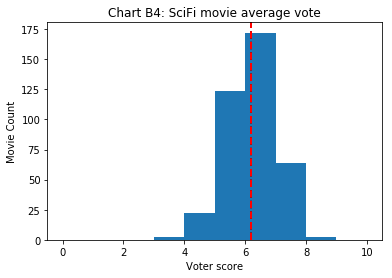

In [99]:
#Create a sub dataframe for Sci Fi movies
df_scifi = df[df.SciFi == 1]

#Action movies statistics
scifi_avg= df_scifi['vote_average'].mean()
scifi_median = df_scifi['vote_average'].median()

#Histogram input and labels
plt.xlabel('Voter score')
plt.ylabel('Movie Count')
plt.hist(df_scifi['vote_average'], bins=vote_range)
plt.title('Chart B4: SciFi movie average vote')
#Draw the average line in black
plt.axvline(scifi_avg, color='k', linestyle='dashed', linewidth=2)
#Draw median in red
plt.axvline(scifi_median, color='r', linestyle='dashed', linewidth=2)

plt.show


In [100]:
#Same observation as chart B1.

<function matplotlib.pyplot.show>

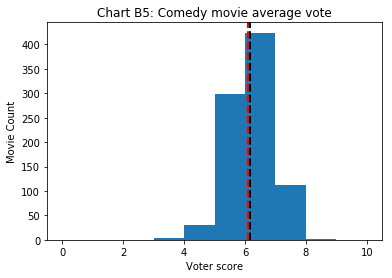

In [101]:
#Create a sub dataframe for comedy movies
df_comedy = df[df.Comedy == 1]
#Comedy movies statistics
comedy_avg= df_comedy['vote_average'].mean()
comedy_median = df_comedy['vote_average'].median()

#Histogram input and labels
plt.xlabel('Voter score')
plt.ylabel('Movie Count')
plt.hist(df_comedy['vote_average'], bins=vote_range)
plt.title('Chart B5: Comedy movie average vote')
#Draw the average line in black
plt.axvline(comedy_avg, color='k', linestyle='dashed', linewidth=2)
#Draw median in red
plt.axvline(comedy_median, color='r', linestyle='dashed', linewidth=2)

plt.show

In [102]:
#Same observation as chart B1.

<a id='conclusions'></a>
## Conclusions

> On average, a movie will return about 3 times of the money invested in it. The median return rate is 2.5.
This does not include movies with a budget less than 1 million USD which might have a higher return.
The plot for the profitability is seen as skewed to the right.

> For the next question we picked five arbitrary categories: Horror, action, comedy, thriller, and science fiction.
We compared the  popularity of each of each based on voter count.
The amount of people who voted must be at least 100 to form a valid sample size.
The plots show that the average user will rate a movie 6/10 regardless of the genre.
A certain genre does not guarantee a higher rating, there are probably other factors that do.

> The study hs about 2500 samples for the first question and at least 350 for each plot in the second.
It is possible that the missing values may have skewed the data in one direction or the other.

>We also did not study a particular director, cast, production studio, nor the runtime.
Any of these parameters might have a significant impact on the metrics by which we measure movie success.
For example we might be comparing short movies against long movies and then agaisnt even longer ones.
